<a href="https://colab.research.google.com/github/Pyeonseohee/Deeplearning/blob/main/Deepnoid_Lecture03_RCNN_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Region Proposal method

Selective Search package installation

In [1]:
!pip install selectivesearch

  Created wheel for selectivesearch: filename=selectivesearch-0.4-cp36-none-any.whl size=4359 sha256=ef7ae29cea3ce8171620855baaaa6b02dbb312b6f2b5ca46a1e2ed6588c0c4e0
  Stored in directory: /root/.cache/pip/wheels/ab/a0/bd/a56e017d10730401fce75f62ff9364004368b0b96f12c026ba
Successfully built selectivesearch


Region Proposal by selective search

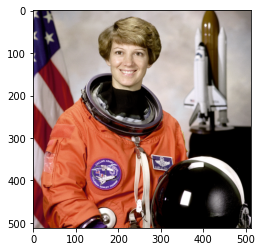

[{'labels': [0.0], 'rect': (0, 0, 15, 26), 'size': 313},
 {'labels': [1.0], 'rect': (0, 0, 61, 144), 'size': 4794},
 {'labels': [2.0], 'rect': (10, 0, 103, 227), 'size': 2071},
 {'labels': [3.0], 'rect': (46, 0, 353, 326), 'size': 43655},
 {'labels': [4.0], 'rect': (396, 0, 12, 74), 'size': 193},
 {'labels': [5.0], 'rect': (393, 0, 42, 184), 'size': 4752},
 {'labels': [6.0], 'rect': (423, 0, 22, 62), 'size': 322},
 {'labels': [7.0], 'rect': (430, 0, 81, 269), 'size': 15441},
 {'labels': [8.0], 'rect': (22, 11, 18, 20), 'size': 68},
 {'labels': [9.0], 'rect': (183, 14, 122, 219), 'size': 1147}]

In [3]:
import skimage.data
import selectivesearch
import matplotlib.pyplot as plt

img = skimage.data.astronaut()
img_lbl, regions = selectivesearch.selective_search(img, scale = 500, sigma = 0.9, min_size = 10)
plt.imshow(img)
plt.show()
regions[:10]

Changes in regional proposals according to the minimum size

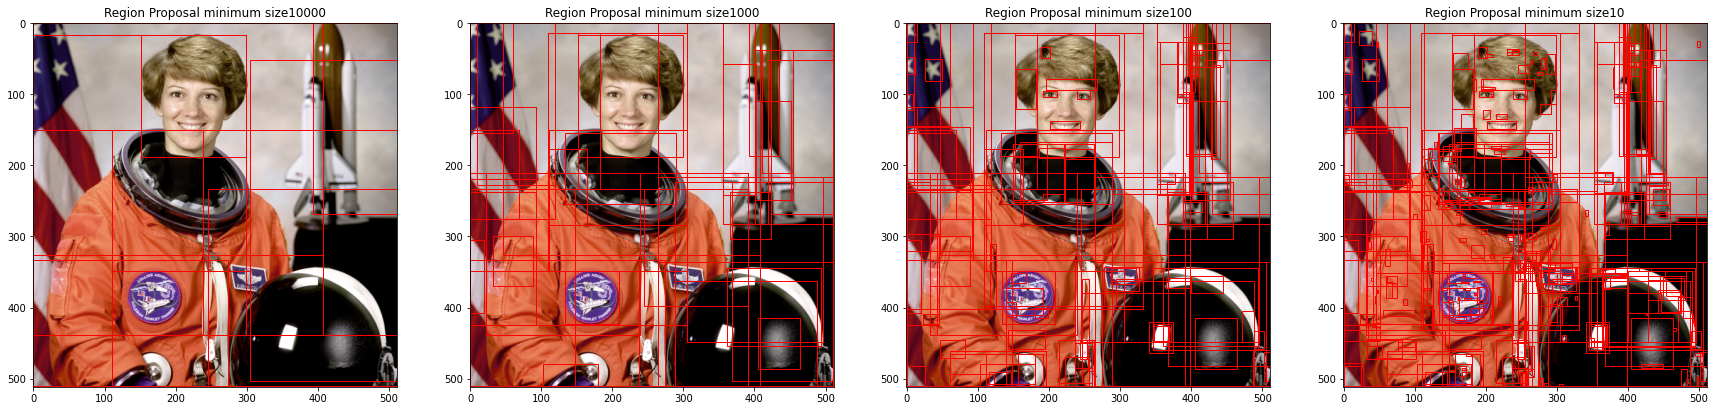

In [4]:
import matplotlib.patches as patches

fig = plt.figure(figsize = (30, 8))

for i, min_size in enumerate([10000, 1000, 100, 10]):
  img_lbl, regions = selectivesearch.selective_search(img, scale = 500, sigma = 0.9, min_size = min_size)

  ax = fig.add_subplot(1, 4, i+1)
  ax.imshow(img)
  ax.set_title(f'Region Proposal minimum size{min_size}')

  for region in regions:
    x = region['rect'][0]
    y = region['rect'][1]
    w = region['rect'][2]
    h = region['rect'][3]

    rect = patches.Rectangle((x,y),
                             w, h, linewidth = 1,
                             edgecolor = 'red',
                             fill = False)
    ax.add_patch(rect)

# RCNN

RCNN github installation

In [5]:
!git clone https://github.com/yangxue0827/RCNN.git
!pip install opencv-python
!pip install tflearn
%cd ./RCNN

Cloning into 'RCNN'...
remote: Enumerating objects: 1526, done.
remote: Total 1526 (delta 0), reused 0 (delta 0), pack-reused 1526
Receiving objects: 100% (1526/1526), 85.90 MiB | 46.37 MiB/s, done.
Resolving deltas: 100% (67/67), done.
     |████████████████████████████████| 112kB 10.2MB/s 
  Created wheel for tflearn: filename=tflearn-0.5.0-cp36-none-any.whl size=127301 sha256=c86c33193d60812d6d975d8b7de4b5646552bcc89a14681594bb2a77c2143d5b
  Stored in directory: /root/.cache/pip/wheels/31/d2/ed/fb9a0d301dd9586c11e9547120278e624227f22fd5f4baf744
Successfully built tflearn
/content/RCNN


# Model pre-training

Visualize pre-training dataset

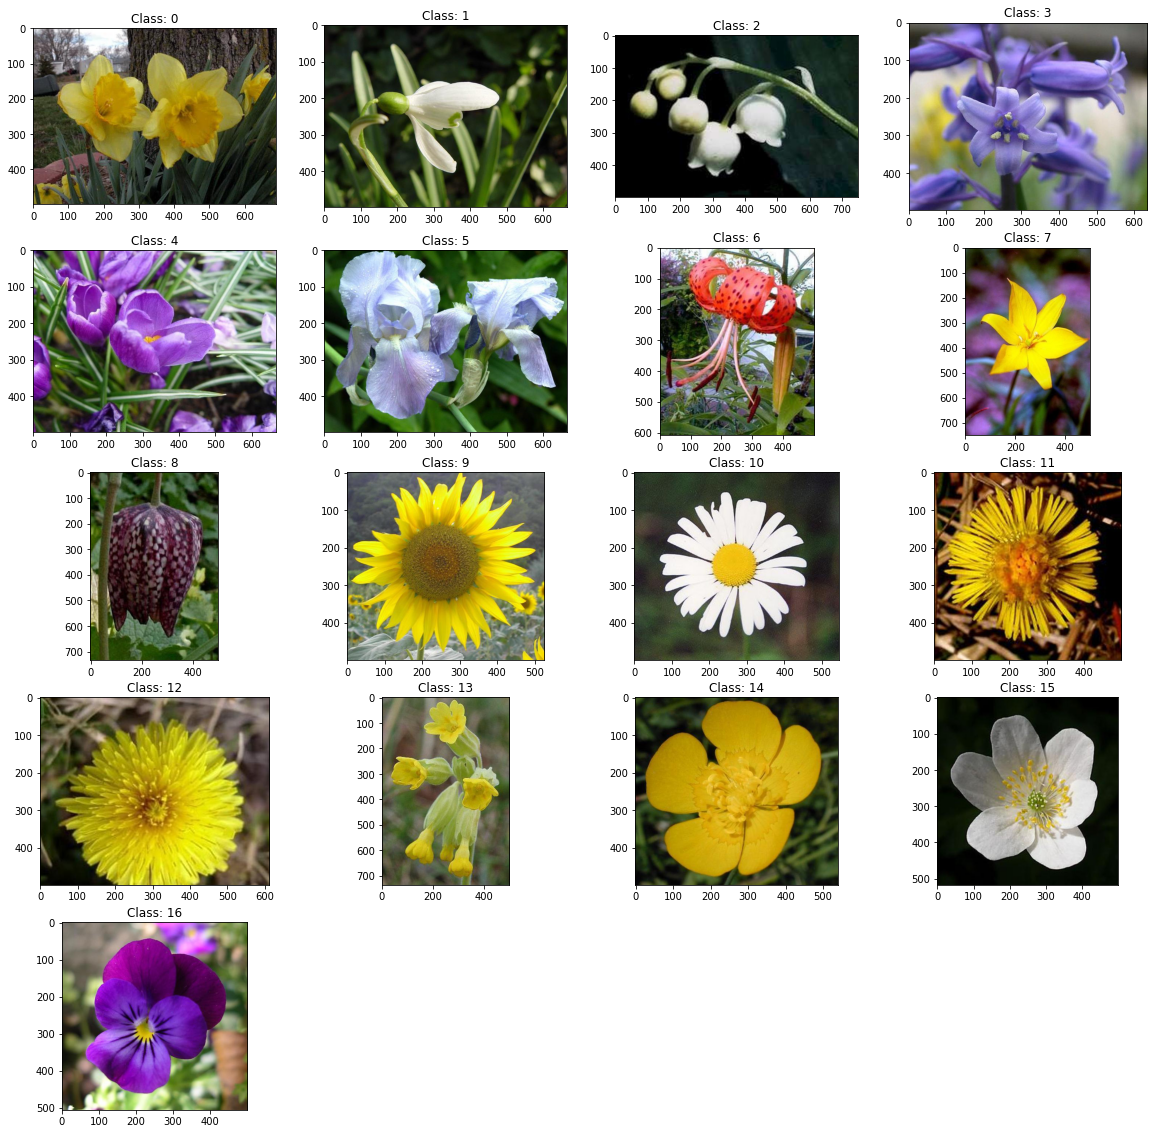

In [7]:
import skimage
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (20, 20))
for i in range(17):
  filename = f'image_{i*80+1:04}.jpg'
  img = skimage.io.imread(f'./17flowers/jpg/{i}/{filename}')
  ax = fig.add_subplot(5, 4, i+1)
  ax.imshow(img)
  #ax.set_title(f'{filename}           Class{i}')
  ax.set_title(f'Class: {i}')
plt.show()

Architecture design

In [15]:
from train_alexnet import *

IMAGE_SIZE = [227, 227]
num_classes = 17

#Building 'AlexNet'
def create_alexnet(num_classes):
  network = input_data(shape = [None, IMAGE_SIZE[0], IMAGE_SIZE[1], 3])
  network = conv_2d(network, 96, 11, strides=4, activation='relu')
  network = max_pool_2d(network, 3, strides=2)
  network = local_response_normalization(network)
  network = conv_2d(network, 256, 5, activation='relu')
  network = max_pool_2d(network, 3, strides=2)
  network = local_response_normalization(network)
  network = conv_2d(network, 384, 3, activation='relu')
  network = conv_2d(network, 384, 3, activation='relu')
  network = conv_2d(network, 256, 3, activation='relu')
  network = max_pool_2d(network, 3, strides=2)
  network = local_response_normalization(network)
  network = fully_connected(network, 4096, activation='tanh')
  network = dropout(network, 0.5)
  network = fully_connected(network, 4096, activation='tanh')
  network = dropout(network, 0.5)
  network = fully_connected(network, num_classes, activation='softmax')
  network = regression(network, optimizer='momentum',
                         loss='categorical_crossentropy',
                         learning_rate=0.001)
  return network

Model pre-training

In [10]:
!python train_alexnet.py

2021-02-04 08:27:12.033157: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
Instructions for updating:
non-resource variables are not supported in the long term
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.initializers.variance_scaling instead with distribution=uniform to get equivalent behavior.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
2021-02-04 08:27:20.592008: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-02-04 08:27:20.593235: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-02-04 08:2

Google drive mount

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Model create & Load weights

In [16]:
# Use a already trained alexnet with the last layer redesigned
def create_alexnet():
    # Building 'AlexNet'
    network = input_data(shape=[None, config.IMAGE_SIZE, config.IMAGE_SIZE, 3])
    network = conv_2d(network, 96, 11, strides=4, activation='relu')
    network = max_pool_2d(network, 3, strides=2)
    network = local_response_normalization(network)
    network = conv_2d(network, 256, 5, activation='relu')
    network = max_pool_2d(network, 3, strides=2)
    network = local_response_normalization(network)
    network = conv_2d(network, 384, 3, activation='relu')
    network = conv_2d(network, 384, 3, activation='relu')
    network = conv_2d(network, 256, 3, activation='relu')
    network = max_pool_2d(network, 3, strides=2)
    network = local_response_normalization(network)
    network = fully_connected(network, 4096, activation='tanh')
    network = dropout(network, 0.5)
    network = fully_connected(network, 4096, activation='tanh')
    network = regression(network, optimizer='momentum',
                         loss='categorical_crossentropy',
                         learning_rate=0.001)
    return network
net = create_alexnet()
model = tflearn.DNN(net)
model.load('/content/drive/MyDrive/RCNN/pre_train_model/model_save.model'

INFO:tensorflow:Restoring parameters from /content/drive/MyDrive/RCNN/pre_train_model/model_save.model


NotFoundError: ignored

Inference latent vector

In [ ]:
from train_alexnet import *

train_list = './train_list.txt'
train_class = 17
X, Y = load_data(train_list, train_class)

N = len(X)
offset = 100
latent_vector_len = 4096
train_latent = np.zeros((N, latent_vector_len))

for i in range(0, N, offset):
  train_latent[i: i+offset] = model.predict(X[i: i+offset])
  print(f'{i}/{N}')

train_latent.shape

Visualize latent space by PCA

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
class_batch = 80
nn = 7

fig = plt.figure(figsize = (20, 20))

for i in range(nn):
  for j in range(i, nn):
    ax = fig.add_subplot(nn, nn, i*nn+j+1)
    if (i != j):
      i_range = np.arange(i*class_batch, (i+1)*class_batch)
      j_range = np.arange(j*class_batch, (j+1)*class_batch)
      pca.fit(train_latent[np.append(i_range, j_range)])
      xy = pca.transform(train_latent[np.append(i_rangem j_range)])

      ax.scatter(xy[:class_batch, 0], xy[:class_batch, 1], label = f'class={i}', s = 15)
      ax.scatter(xy[class_batch:, 0], xy[class_batch:, 1], label = f'class:{j}', s = 15)
      ax.legend()
plt.show()

# Model fine-tuning

Load fine-tuning dataset

In [ ]:
import numpu as np
import os
import tools

data_set = '/content/drive/MyDrive/RCNN/data_set'

def load_from_npy(data_set):
  images, labels = []. []
  data_list = os.listdir(data_set)
  data_list.sort()
  #random.shuffle(data_list)
  for ind, d in enumerate(data_list):
    i, l = np.load(os.path.join(data_set, d), allow_pickle = True)
    images.extend(i)
    labels.extend(l)
    tools.view_bar("load data of %s" % d, ind + 1, len(data_list))
  print(' ')
  return images, labels

X, Y = load_from_npy(data_set)

Visualize fine-tuning dataset

In [ ]:
import matplotlib.patches as mpatches
from  preprocessing_RCNN import *
from RCNN_output import *

img_path = './2flowers/jpg/0/image_0561.jpg' 
imgs, verts = image_proposal(img_path)
gt = [90,126,350,434]

fig = plt.figure(figsize=(10,5))

img = skimage.io.imread(img_path)
ax = fig.add_subplot(1,2,1)
ax.set_title('region proposal')
ax.imshow(img)
for x, y, w, h in verts:
    rect = mpatches.Rectangle(
        (x, y), w, h, fill=False, edgecolor='red', linewidth=1)
    ax.add_patch(rect)

ax = fig.add_subplot(1,2,2)
ax.set_title('ground truth')
ax.imshow(img)
[x, y, w, h] = gt
rect = mpatches.Rectangle(
    (x, y), w, h, fill=False, edgecolor='green', linewidth=1)
ax.add_patch(rect)
plt.show()

fig = plt.figure(figsize=(20,10))
for i,(x,r) in enumerate(zip(imgs[2:10], verts[2:10])):
  ax = fig.add_subplot(1,8,i+1)
  ax.imshow(img)

  proposal_img, proposal_vertice = clip_pic(img, r)
  iou = IOU(gt, proposal_vertice)
  ax.set_title(f'IOU:{iou:.3f}')

  [x, y, w, h] = gt
  rect = mpatches.Rectangle(
        (x, y), w, h, fill=False, edgecolor='green', linewidth=1)
  ax.add_patch(rect)

  x, y, w, h = r
  rect = mpatches.Rectangle(
        (x, y), w, h, fill=False, edgecolor='red', linewidth=1)
  ax.add_patch(rect)

plt.show()

fig = plt.figure(figsize=(20,10))
for i,(x,y) in enumerate(zip(X[2:10],Y[2:10])):
  ax = fig.add_subplot(1,8,i+1)
  ax.imshow(np.array(x,dtype=np.int))
  ax.set_title(str(y))
plt.show()


img_path = './2flowers/jpg/1/image_1282.jpg' 
imgs, verts = image_proposal(img_path)
gt = [90,35,330,425]

fig = plt.figure(figsize=(10,5))

img = skimage.io.imread(img_path)
ax = fig.add_subplot(1,2,1)
ax.set_title('region proposal')
ax.imshow(img)
for x, y, w, h in verts:
    rect = mpatches.Rectangle(
        (x, y), w, h, fill=False, edgecolor='red', linewidth=1)
    ax.add_patch(rect)

ax = fig.add_subplot(1,2,2)
ax.set_title('ground truth')
ax.imshow(img)
[x, y, w, h] = gt
rect = mpatches.Rectangle(
    (x, y), w, h, fill=False, edgecolor='green', linewidth=1)
ax.add_patch(rect)
plt.show()

fig = plt.figure(figsize=(20,10))
for i,(x,r) in enumerate(zip(imgs[3:11], verts[3:11])):
  ax = fig.add_subplot(1,8,i+1)
  ax.imshow(img)

  proposal_img, proposal_vertice = clip_pic(img, r)
  iou = IOU(gt, proposal_vertice)
  ax.set_title(f'IOU:{iou:.3f}')

  [x, y, w, h] = gt
  rect = mpatches.Rectangle(
        (x, y), w, h, fill=False, edgecolor='green', linewidth=1)
  ax.add_patch(rect)

  x, y, w, h = r
  rect = mpatches.Rectangle(
        (x, y), w, h, fill=False, edgecolor='red', linewidth=1)
  ax.add_patch(rect)

plt.show()

fig = plt.figure(figsize=(20,10))
for i,(x,y) in enumerate(zip(X[47:55],Y[47:55])):
  ax = fig.add_subplot(1,8,i+1)
  ax.imshow(np.array(x,dtype=np.int))
  ax.set_title(str(y))
plt.show()

Model fine-tuning

In [ ]:
!python fine_tune_RCNN.py

Load fine-tuning weights

In [ ]:
model.load('/content/drive/MyDrive/RCNN/fine_tune_model/_fine_tune_model_save.model')

# Model test

Predict sample with SVM

In [ ]:
train_file_folder = '/content/drive/MyDrive/RCNN/svm_train'
img_path = './17flowers/jpg/16/image_1281.jpg'  # or './17flowers/jpg/16/****.jpg'
imgs, verts = image_proposal(img_path)
tools.show_rect(img_path, verts)

svms = []
for file in os.listdir(train_file_folder):
    if file.split('_')[-1] == 'svm.pkl':
        svms.append(joblib.load(os.path.join(train_file_folder, file)))
if len(svms) == 0:
    svms = train_svms(train_file_folder, model)
print("Done fitting svms")
features = model.predict(imgs)
print("predict image:")
print(np.shape(features))
results = []
results_label = []
count = 0
conf_score = []

for f in features:
    for svm in svms:
        pred = svm.predict([f.tolist()])
        # not background
        if pred[0] != 0:
            results.append(verts[count])
            results_label.append(pred[0])
            conf_score.append(svm.decision_function([f.tolist()])[0])
    count += 1
print("result:")
print(results)
print("result label:")
print(results_label)
tools.show_rect(img_path, results)

Check confidence score

In [ ]:
conf_score

In [ ]:
train_file_folder = '/content/drive/MyDrive/RCNN/svm_train'
img_path = f'./17flowers/jpg/7/image_0563.jpg'
imgs, verts = image_proposal(img_path)
tools.show_rect(img_path, verts)

svms = []
for file in os.listdir(train_file_folder):
    if file.split('_')[-1] == 'svm.pkl':
        svms.append(joblib.load(os.path.join(train_file_folder, file)))
if len(svms) == 0:
    svms = train_svms(train_file_folder, model)
print("Done fitting svms")
features = model.predict(imgs)
print("predict image:")
print(np.shape(features))
results = []
results_label = []
count = 0
conf_score = []
for f in features:
    for svm in svms:
        pred = svm.predict([f.tolist()])
        # not background
        if pred[0] != 0:
            results.append(verts[count])
            results_label.append(pred[0])
            conf_score.append(svm.decision_function([f.tolist()])[0])
    count += 1
print("result:")
print(results)
print("result label:")
print(results_label)
tools.show_rect(img_path, results)

In [ ]:
conf_score

# Assignment

Get IOU score

In [ ]:
def get_IOU(img, region1, region2):
  proposal_img, proposal_vertice1 = clip_pic(img, region1)
  proposal_img, proposal_vertice2 = clip_pic(img, region2)
  iou = IOU(proposal_vertice1, proposal_vertice2)
  return iou

get_IOU usage

In [ ]:
img_path = f'./17flowers/jpg/7/image_0563.jpg'
img = skimage.io.imread(img_path)
iou = get_IOU(img, results[0], results[1])
print(iou)

Bound-boxs & confidence scores

In [ ]:
print(results)
print(conf_score)